In [43]:
from math import sqrt
import numpy as np
import pandas as pd
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

In [44]:
# Задание 0
delta = 3
sigma2 = 225
beta = 0.95
z_a = 1.96

n = ((z_a*sqrt(sigma2))/delta)**2
n

96.03999999999998

In [45]:
# Задание 1

n = 25
x = 130
sigma = 12
z_a = 2.33

delta = (sigma/sqrt(n))*z_a
print(f'Доверительный интервал ({x-delta}; {x+delta})')

Доверительный интервал (124.408; 135.592)


In [46]:
# Задание 2
a = 0.001

# Выборка мужчин со средним ростом 171
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)
# Выборка женщин со средним ростом 165
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)

population=np.concatenate((population_men, population_women))
population.mean()


18.97915025223856

In [47]:
stats.ttest_ind(a=population_men, b=population_women, equal_var=False)

Ttest_indResult(statistic=2.073546911730484, pvalue=0.03814264482126858)

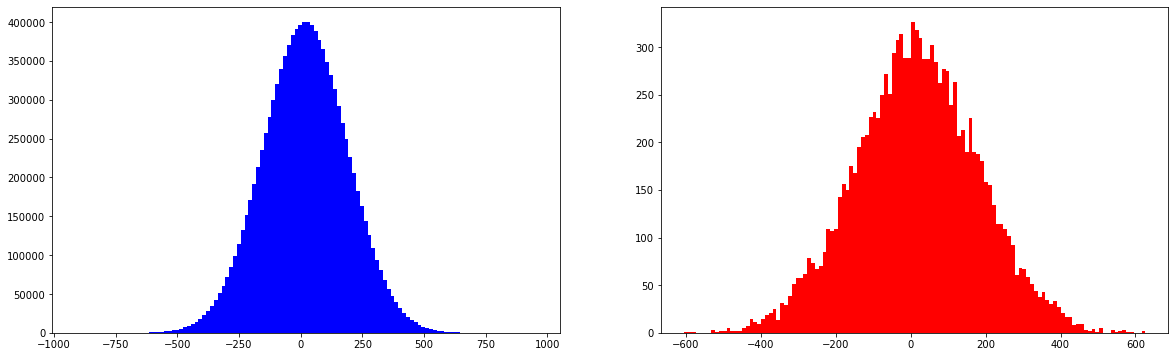

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,6
plt.subplot(1, 2, 1);
plt.hist(population_men, bins=120, color='b');
plt.subplot(1, 2, 2);
plt.hist(population_women, bins=120, color='r');
# plt.show()

In [49]:
# Задание 3
sigma = 150
B = 95
Z = 1.96
delta = 50
N = ((sigma*Z)/delta)**2
N

34.5744

In [50]:
# Задание 4
import scipy.stats as stats

a = 0.05
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
print(observations)
oddsratio, pvalue = stats.fisher_exact(observations)
print('\n', oddsratio, pvalue, '\n')
if pvalue > a:
    print('Маг умеет предсказывать погоду')
else:
    print('Маг не умеет предсказывать погоду')

        Ответ волшебника  Реальность
Дождь                 10          15
Солнце                39          34

 0.5811965811965812 0.35417955365927367 

Маг умеет предсказывать погоду


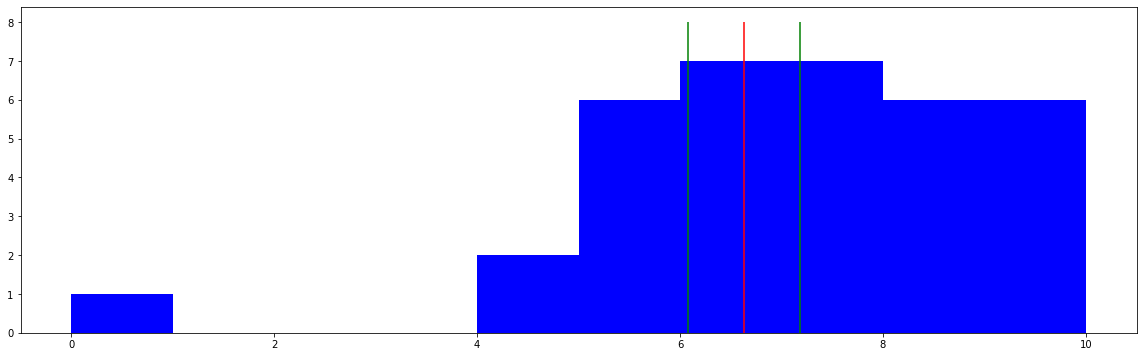

In [51]:
# Задание 5

data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

B = 0.90

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

x1, x, x2 = mean_confidence_interval(data, B)
plt.hist(data, color='b');
plt.vlines( x=x1, ymin=0, ymax=8, color='green', label='90% CI' );
plt.vlines( x=x2, ymin=0, ymax=8, color='green');
plt.vlines( x=x, ymin=0, ymax=8, color='red');

mean: 4.6953125
statistic: 7.35744682757447 pvalue: 2.1159475572725764e-11


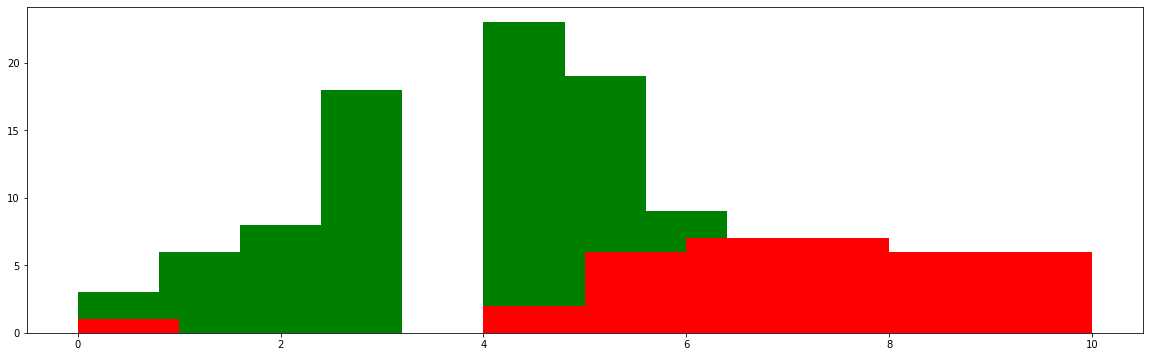

In [52]:
# Задание 6

data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


datas = np.concatenate((data_1, data_2))
print('mean:', datas.mean())
stat, pvalue = stats.ttest_ind(data_1, data_2)
print('statistic:', stat, 'pvalue:', pvalue)

plt.hist(data_2, color='g');
plt.hist(data_1, color='r');

In [ ]:
# Задание 7

# Если p-value < 0,05, то аргументов достаточно чтоб отвергнуть нулевую гипотезу и мы должны рассмотреть алтернативную гипотезу. В противном случаи принимаем нулевую гипотезу с нормальным распределением.

In [54]:
# Задание 8
a = 0.05

np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)


In [55]:
stat, pvalue = stats.ttest_ind(A, B)
stat, pvalue

(1.8847229265385363, 0.05995194857529052)

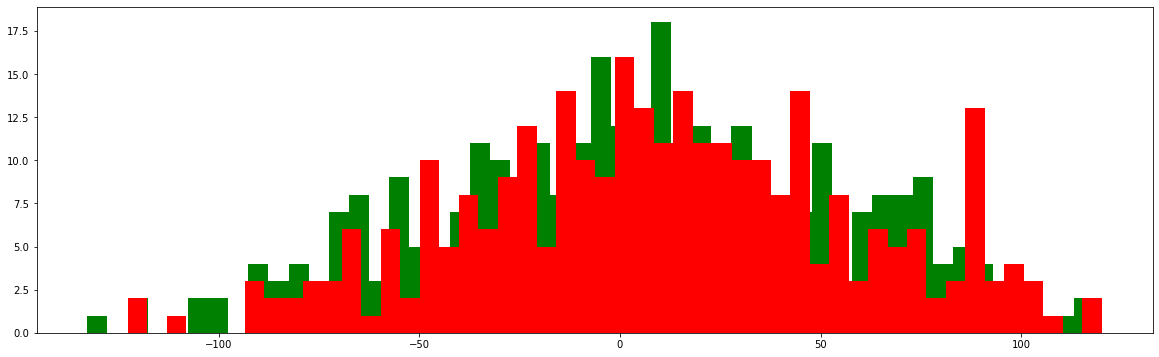

In [56]:
plt.hist(B, bins=50, color='g');
plt.hist(A, bins=50, color='r');

In [58]:
#Значение pvalue = 0.0599 говорит о том, что существует вероятность ~6%, что данные выборки настолько далеко друг от друга для двух одинаковых групп. Это больше, чем уровень достоверности 5%.